# Fibonacci Sequence

## Recursive Implementation
Takes a long time to run, poor time complexity of 2^n

In [ ]:
def fib(n):
    if n <= 2:
        return 1
    
    else:
        return fib(n-1) + fib(n-2)
    
fib(50)


This is because when visualized, each subtree is calculated multiple times.

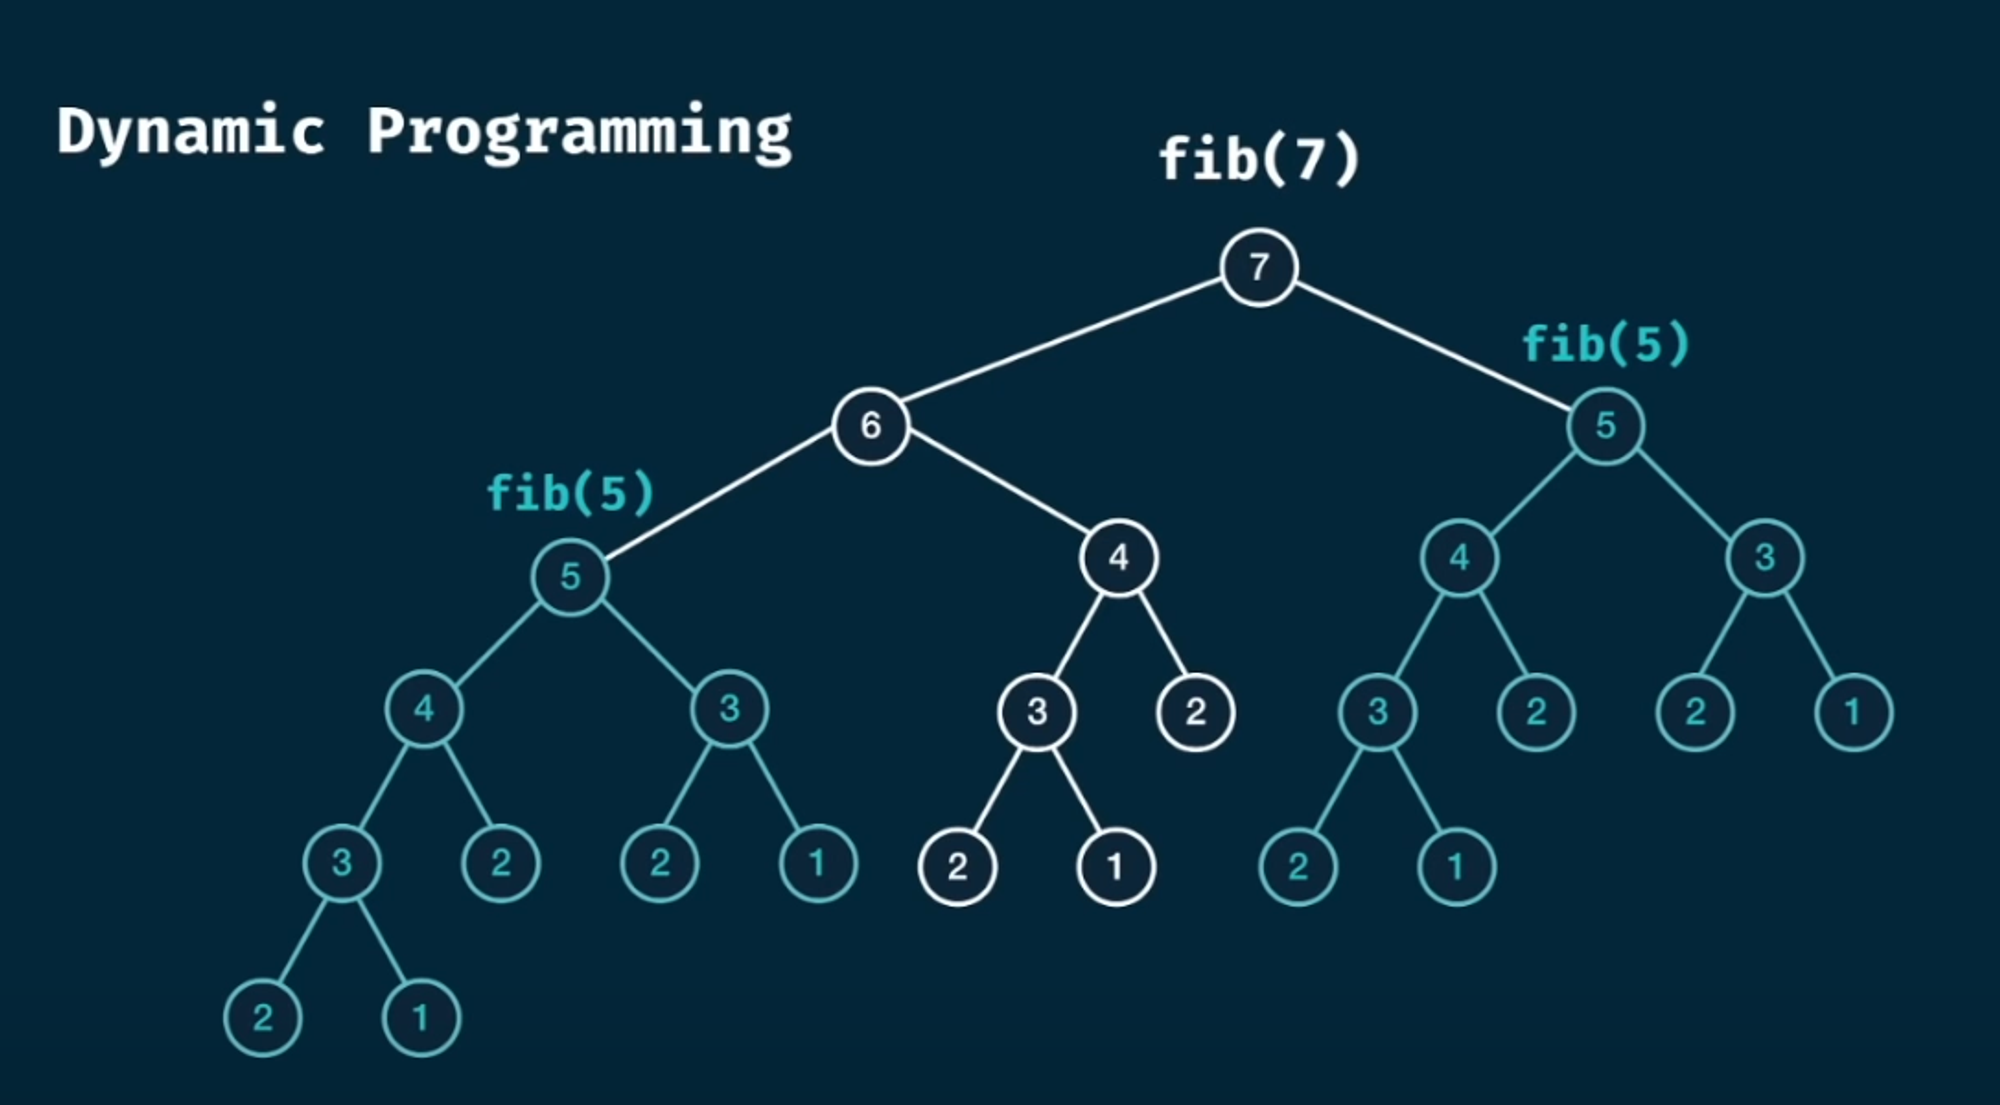

## Optimization Fibonnaci
When visualizing, we can see subtree repititons. If we were to save a subtree once it is calculated, we can use the saved tree for the repeating calculations to improve the speed.

Time complexity now is O(n)

In [12]:
# Memoization

def fib(n, memo={}):
    if n in memo:
        return memo[n]
    
    if n <= 2:
        return 1
    
    else:
        # Saving each subtree
        memo[n] = fib(n-1) + fib(n-2)
        return memo[n]
    
fib(50)

12586269025

On Visualizing

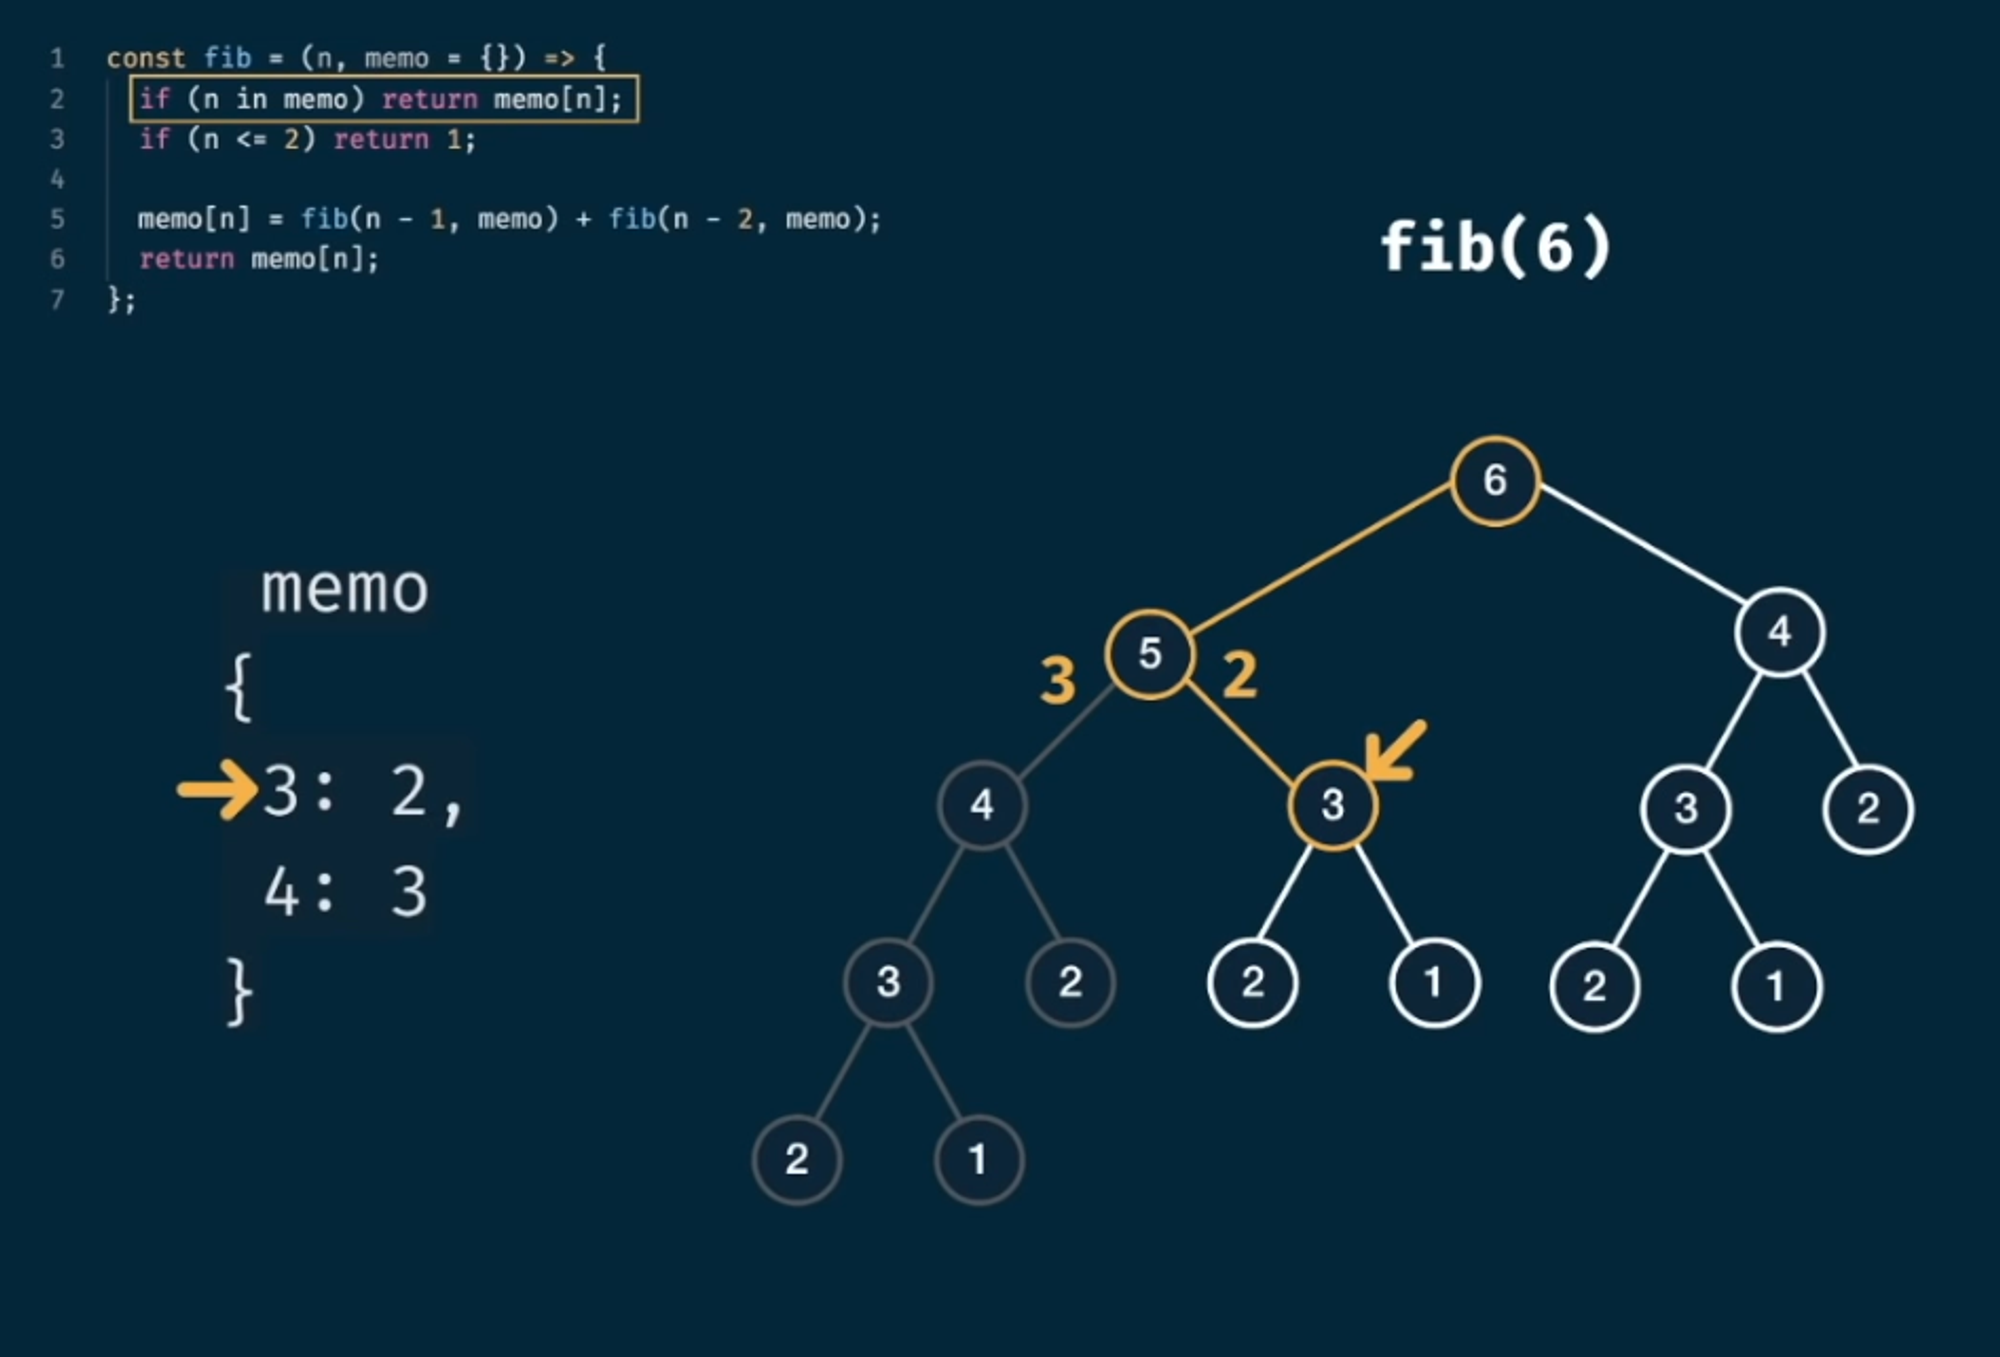